In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt #
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix
from sklearn.neural_network import MLPClassifier
import pickle

In [2]:
df = pd.read_csv("../data/cleanedData.csv")

In [3]:
# Separate target(label) from predictor columns
y = df.label

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['fullContent'])

# Continuous features normalization
scaler = StandardScaler()
contd = scaler.fit_transform(df[['punctuationCount', 'subjectLength', 'bodyLength', 'totalLength']])

# Sparse binary features
sparse_features = csr_matrix(df[["urls", "totalLength", "generalConsumer", "govDomain", "eduDomain", "orgDomain", "netDomain", "otherDomain", "html", "punctuationCount"]].values)

X = hstack([sparse_features, contd, tfidf_matrix])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [4]:
# base model
basem = MLPClassifier(hidden_layer_sizes = 5, random_state=1, max_iter=20, early_stopping=True, verbose=True).fit(X_train, y_train)

# Evaluate the model
y_pred_prob = basem.predict(X_test)
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')

Iteration 1, loss = 0.63680900
Validation score: 0.720090
Iteration 2, loss = 0.58374676
Validation score: 0.776242
Iteration 3, loss = 0.51481218
Validation score: 0.824774
Iteration 4, loss = 0.45398113
Validation score: 0.915914
Iteration 5, loss = 0.38878022
Validation score: 0.939616
Iteration 6, loss = 0.32465939
Validation score: 0.949774
Iteration 7, loss = 0.27502442
Validation score: 0.965011
Iteration 8, loss = 0.25640983
Validation score: 0.961625
Iteration 9, loss = 0.20996820
Validation score: 0.968397
Iteration 10, loss = 0.19152750
Validation score: 0.977709
Iteration 11, loss = 0.17035789
Validation score: 0.974887
Iteration 12, loss = 0.14325146
Validation score: 0.963036
Iteration 13, loss = 0.14583082
Validation score: 0.979402
Iteration 14, loss = 0.12077678
Validation score: 0.983352
Iteration 15, loss = 0.12060172
Validation score: 0.977991
Iteration 16, loss = 0.12933031
Validation score: 0.985892
Iteration 17, loss = 0.09401816
Validation score: 0.989278
Iterat

C:\Users\zihin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [5]:
def printCM(predictLabels, trueLabels):
    class_report = classification_report(trueLabels, predictLabels)
    print(class_report)

    cm = confusion_matrix(trueLabels, predictLabels)

    # Define class labels for the confusion matrix (for binary classification)
    class_labels = ['Phishing', 'Non-Phishing']  # Adjust according to your classes

    # Create the heatmap without annotations (annot=False)
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', cbar=False)

    # Set axis labels
    ax.set_xlabel('True', fontsize=12)
    ax.set_ylabel('Predicted', fontsize=12)

    # Set the class labels on the axes
    ax.set_xticklabels(class_labels, fontsize=10)
    ax.set_yticklabels(class_labels, fontsize=10)

    # Set title
    plt.title('Confusion Matrix')

    # Manually add True Positive, False Positive, True Negative, and False Negative annotations
    # You must use the exact cell positions for each term in the 2x2 confusion matrix
    ax.text(0.5, 0.5, 'TP\n(' + str(cm[1, 1]) + ')', ha='center', va='center', fontsize=12)
    ax.text(1.5, 0.5, 'FP\n(' + str(cm[0, 1]) + ')', ha='center', va='center', fontsize=12)
    ax.text(0.5, 1.5, 'FN\n(' + str(cm[1, 0]) + ')', ha='center', va='center', fontsize=12)
    ax.text(1.5, 1.5, 'TN\n(' + str(cm[0, 0]) + ')', ha='center', va='center', fontsize=12)

    # Show the plot
    plt.tight_layout()
    return plt.show()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4191
           1       0.99      0.99      0.99      4667

    accuracy                           0.99      8858
   macro avg       0.99      0.99      0.99      8858
weighted avg       0.99      0.99      0.99      8858



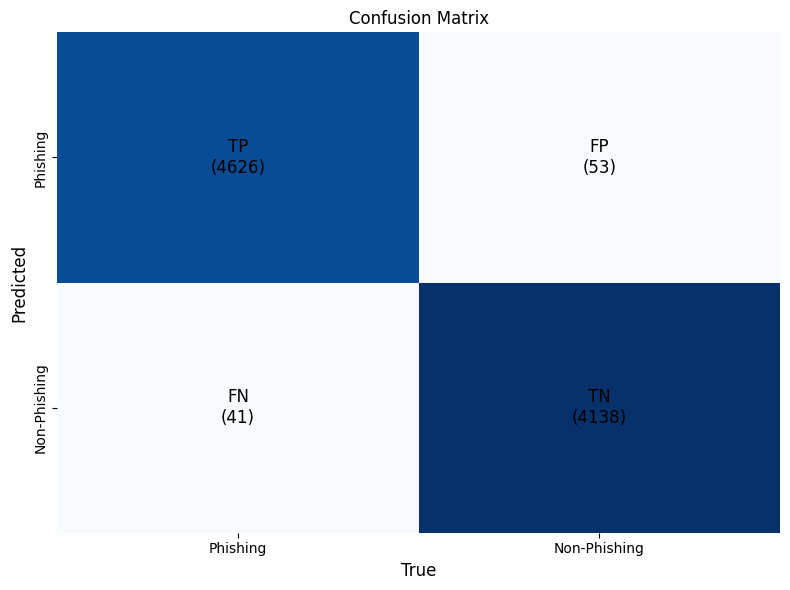

In [6]:
# create heatmap
printCM(y_test, y_pred_binary)

In [7]:
# 2nd model
tunemodel = MLPClassifier(hidden_layer_sizes = 20, random_state=1, max_iter=100, early_stopping=True, verbose=True).fit(X_train, y_train)

# Evaluate the model
y_pred_prob = tunemodel.predict(X_test)
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')


Iteration 1, loss = 0.64310749
Validation score: 0.942156
Iteration 2, loss = 0.37162202
Validation score: 0.865124
Iteration 3, loss = 0.20039382
Validation score: 0.972912
Iteration 4, loss = 0.16521630
Validation score: 0.977991
Iteration 5, loss = 0.17662837
Validation score: 0.983070
Iteration 6, loss = 0.13081161
Validation score: 0.985609
Iteration 7, loss = 0.11239552
Validation score: 0.987585
Iteration 8, loss = 0.14772740
Validation score: 0.967269
Iteration 9, loss = 0.14202983
Validation score: 0.990688
Iteration 10, loss = 0.06085204
Validation score: 0.970937
Iteration 11, loss = 0.22401905
Validation score: 0.983352
Iteration 12, loss = 0.08277798
Validation score: 0.987020
Iteration 13, loss = 0.12881701
Validation score: 0.990688
Iteration 14, loss = 0.15181352
Validation score: 0.989842
Iteration 15, loss = 0.07025833
Validation score: 0.992381
Iteration 16, loss = 0.11081300
Validation score: 0.987585
Iteration 17, loss = 0.11089009
Validation score: 0.979120
Iterat

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4164
           1       1.00      0.99      0.99      4694

    accuracy                           0.99      8858
   macro avg       0.99      0.99      0.99      8858
weighted avg       0.99      0.99      0.99      8858



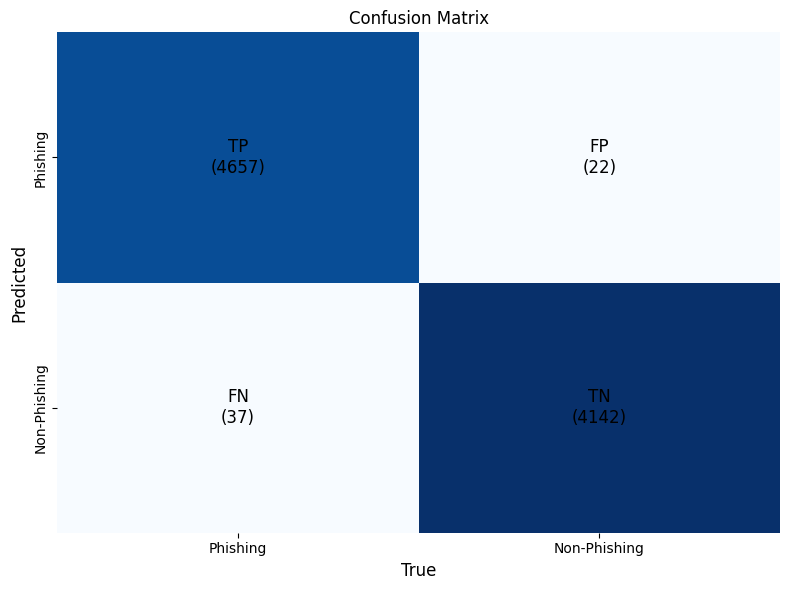

In [8]:
# create heatmap
printCM(y_test, y_pred_binary)

In [9]:
#Saving the tuned models that were already fitted with training data
with open('../model/MLPClassifier_ZiHin.pkl', 'wb') as file: pickle.dump(tunemodel, file)